<a href="https://colab.research.google.com/github/OtsukiTaisuke/Colab/blob/master/NA2_RNN_sin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [0]:
def sin(x, T=100):
    return np.sin(2.0*np.pi*x / T)

def problem(T=100, noise_amp = 0.05):
    x = np.arange(0, 2*T + 1)
    noise = noise_amp*np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise

In [0]:
T = 100
f = problem(T)

data_length = 2*T
maxlen = 25

data=[]
target=[]

for i in range(0, data_length - maxlen + 1):
    data.append(f[i: i + maxlen])
    target.append(f[i + maxlen])
    
X = np.array(data).reshape(len(data), maxlen, 1)
y = np.array(target).reshape(len(data), 1)

In [0]:
N_train = int(len(data) * 0.9)
N_test = len(data) - N_train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=N_test)

In [0]:
n_in = len(X[0][0])
n_hidden = 20
n_out = len(y[0])

In [0]:
def weight_variable(shape, name=None):
    return np.random.normal(scale=.01, size=shape)


early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model = Sequential()
model.add(SimpleRNN(n_hidden,
                    kernel_initializer=weight_variable,
                    input_shape=(maxlen, n_in)))
model.add(Dense(n_out, kernel_initializer=weight_variable))
model.add(Activation('linear'))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error',
              optimizer=optimizer)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
epochs = 500
batch_size = 10

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping])

Instructions for updating:
Use tf.cast instead.
Train on 158 samples, validate on 18 samples
Epoch 1/500
158/158 [==============================] - 0s 2ms/step - loss: 0.5060 - val_loss: 0.3868
Epoch 2/500
158/158 [==============================] - 0s 322us/step - loss: 0.4011 - val_loss: 0.2583
Epoch 3/500
158/158 [==============================] - 0s 318us/step - loss: 0.2185 - val_loss: 0.0949
Epoch 4/500
158/158 [==============================] - 0s 336us/step - loss: 0.0850 - val_loss: 0.0611
Epoch 5/500
158/158 [==============================] - 0s 323us/step - loss: 0.0673 - val_loss: 0.0650
Epoch 6/500
158/158 [==============================] - 0s 313us/step - loss: 0.0462 - val_loss: 0.0477
Epoch 7/500
158/158 [==============================] - 0s 318us/step - loss: 0.0346 - val_loss: 0.0303
Epoch 8/500
158/158 [==============================] - 0s 330us/step - loss: 0.0361 - val_loss: 0.0283
Epoch 9/500
158/158 [==============================] - 0s 378us/step - loss: 0.0266 -

In [0]:
truncate = maxlen
Z = X[:1]  # 元データの最初の一部だけ切り出し

original = [f[i] for i in range(maxlen)]
predicted = [None for i in range(maxlen)]

for i in range(data_length - maxlen + 1):
    z_ = Z[-1:]
    y_ = model.predict(z_)
    sequence_ = np.concatenate(
        (z_.reshape(maxlen, n_in)[1:], y_),
        axis=0).reshape(1, maxlen, n_in)
    Z = np.append(Z, sequence_, axis=0)
    predicted.append(y_.reshape(-1))

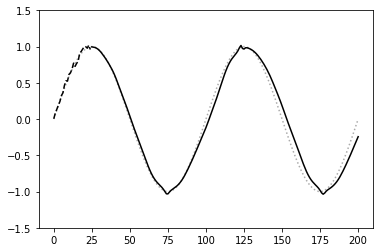

In [0]:
plt.ylim([-1.5, 1.5])
plt.plot(problem(T, noise_amp=0), linestyle='dotted', color='#aaaaaa')
plt.plot(original, linestyle='dashed', color='black')
plt.plot(predicted, color='black')
plt.show()